In [181]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from IPython.display import Image
%matplotlib inline

import seaborn as sns

Рассмотрим нелинейную систему

 \begin{cases}
   sin(x+2)-y=6\\
   x+ cos(y+2) = 2
 \end{cases}

In [182]:
'''Корни согласно WolframAlpha'''
x_true = [1.9733057420725957950, -6.7390864096433335238] # WolframAlpha

In [183]:
# невязка
def residual(u):
    x, y = u
    f1 = abs(np.sin(x+2) - y - 6)
    f2 = abs(x + np.cos(y+2) - 2)
    return [f1, f2]

## Метод простой итерации

Сведем систему к виду $u = f(u)$:

 \begin{cases}
   x = 2 - cos(y+2)\\
   y = sin(x+2)- 6\\
 \end{cases}
 
 $u^{n+1} = f(u^n)$ - МПИ, где $f(x, y) = \begin{pmatrix}
 2 - cos(y+2) \\
 sin(x+2) - 6
 \end{pmatrix}$

In [184]:
def f(u):
    x, y = u
    return [2-np.cos(y+2), np.sin(x+2)-6]

def p(u1, u2):
    return ((u1[0]-u2[0])**2 + (u1[1]-u2[1])**2)**0.5

In [185]:
# метод простой итерации
def msi(u0, eps, verbose=False, extend=False):
    x, y = u0
    fst_step = p(f([x,y]), [x,y])
    n = 0
    q = 0.5**0.5
    extend_xs, extend_ys = [x], [y]
    while not q**n*fst_step/(1-q) < eps:
        x, y = f([x, y])
        extend_xs.append(x)
        extend_ys.append(y)
        n += 1
    if verbose:
        print(f'Метод сошелся за {n} итераций')
    if extend:
        return [x, y, n]
    return [x, y]

In [186]:
u0 = [0,0]
eps = 1e-6
res = msi(u0, eps, verbose=True)
print(f"Результат: {res}, ошибка в евк. норме: {p(res, x_true)}")
print(f"Невязка метода: {residual(res)}")

Метод сошелся за 49 итераций
Результат: [1.973330483019676, -6.739061348581915], ошибка в евк. норме: 3.5216065394487795e-05
Невязка метода: [4.172660013157525e-05, 3.111920789944378e-07]


## Метод Ньютона

 \begin{cases}
   x - 2 + cos(y+2) = 0\\
   y - sin(x+2) + 6 = 0\\
 \end{cases}
 
 $u^{n+1} = u^n - J^{-1} F(u^n)$ - МПИ, где $F(x, y) = \begin{pmatrix}
 x - 2 + cos(y+2) \\
 y - sin(x+2) + 6
 \end{pmatrix}$ и 
 $J = \begin{pmatrix}
 1 & -sin(y+2) \\
 -cos(x+2) & 1
 \end{pmatrix}$
 
 Отметим, что 
 $J^{-1} = \frac{1}{1-sin(y+2)cos(x+2)} \begin{pmatrix}
 1 & sin(y+2) \\
 cos(x+2) & 1
 \end{pmatrix}$
 
 Рассмотрим окресность вблизи решения. В качестве критерия останова будем требовать выполнение условия на итерационную поправку:
 
 \begin{equation}
 ||x^{k}-x^{k-1}||\le \epsilon
 \end{equation}
 
 Будем требовать от метода сходимости за 50 итераций, т.е. если за 50 итераций критерий останова не выполнен считаем, что метод расходится.

In [187]:
# вычисление обратной матрицы
def inv_J(u):
    x, y = u
    return np.dot([[1, np.sin(y+2)], [np.cos(x+2), 1]], 1/(1-np.sin(y+2)*np.cos(x+2)))

In [188]:
# ф-ция F
def F(u):
    x, y = u
    return [x-2+np.cos(y+2), y-np.sin(x+2)+6]

In [200]:
# метод Ньютона
def Newton_method(u0, eps, iter_num, verbose=False, extend=False):
    x, y = u0
    n = 0
    extend_xs, extend_ys = [x], [y]
    print('0-я итерация: %f,%f' % (extend_xs[0], extend_ys[0]))
    while True:
        x, y = x - np.dot(inv_J([x,y]), F([x,y]))[0], y - np.dot(inv_J([x,y]), F([x,y]))[1]
        extend_xs.append(x)
        extend_ys.append(y)
        n += 1
        print('%i-я итерация: %f,%f' % (n, extend_xs[n], extend_ys[n]))
        if (p([extend_xs[-2:-1][0], extend_ys[-2:-1][0]], [extend_xs[-1:][0], extend_ys[-1:][0]]) < eps) or (n > iter_num):
            break
    if verbose:
        print(f'Метод сошелся за {n} итераций')
    if extend:
        return [x, y, n]
    return [x, y]

In [201]:
eps = 1e-6
res = Newton_method([2, -4], eps = eps, iter_num = 50, verbose = True)
print(f"Результат: {res}, ошибка в евк. норме: {p(res, x_true)}")
print(f"Невязка метода: {residual(res)}")

0-я итерация: 2.000000,-4.000000
1-я итерация: 9.205588,-11.466689
2-я итерация: 3.134159,-8.243760
3-я итерация: 1.019127,-7.778210
4-я итерация: 1.711658,-6.565185
5-я итерация: 1.962775,-6.751094
6-я итерация: 1.973280,-6.739110
7-я итерация: 1.973306,-6.739086
8-я итерация: 1.973306,-6.739086
Метод сошелся за 8 итераций
Результат: [1.9733057420725957, -6.739086409643334], ошибка в евк. норме: 2.220446049250313e-16
Невязка метода: [0.0, 0.0]


### Сравнительная характеристика сходимости методов

Для МПИ рассмотрим число итераций до остановки метода для разных элементов сетки

In [49]:
a, N = 25, 26
xs = np.linspace(2-a, 2+a, N)
ys = np.linspace(-7-a, -7+a, N)

ns = []
for x in xs:
    string = []
    for y in ys:
        _, _, n = msi([x, y], 1e-5, extend=True)
        string.append(n)
    ns.append(string)

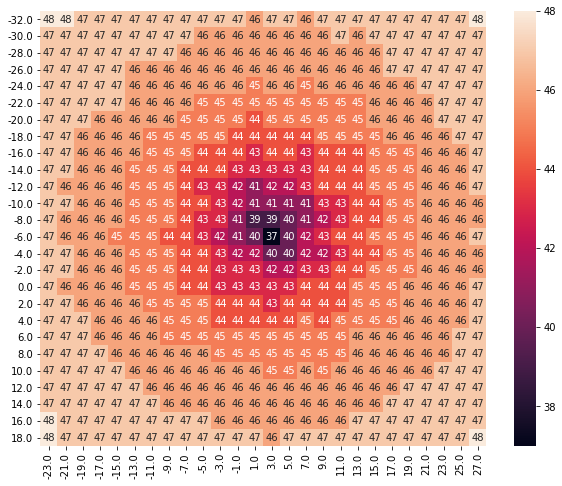

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(ns, annot=True, xticklabels=xs, yticklabels=ys);
#plt.scatter([x_true[0]], [x_true[1]], c='white');

Будем рассматривать сходимость по сетке в случае метода Ньютона. 

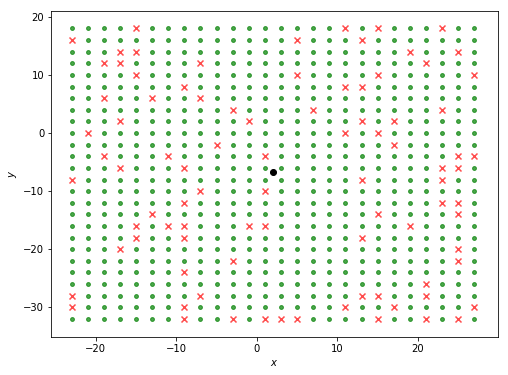

In [172]:
a, N = 25, 26
xs = np.linspace(2-a, 2+a, N)
ys = np.linspace(-7-a, -7+a, N)

plt.figure(figsize=(8,6))

for x in xs:
    for y in ys:
        x0, y0 = Newton_method([x, y], 1e-6, 50)
        if p([x0, y0], x_true) < 1e-6:
            plt.scatter([x], [y], c='g', s=15, alpha=0.7)
        else:
            plt.scatter([x], [y], c='r', marker='x', alpha=0.7)

plt.scatter([x_true[0]], [x_true[1]], c='black');
plt.xlabel('$x$');
plt.ylabel('$y$');

##### Рассмотрим маленькую окресность решения (видим что для начальных значений, взятых из достаточно малой окресности решения метод сходится) 

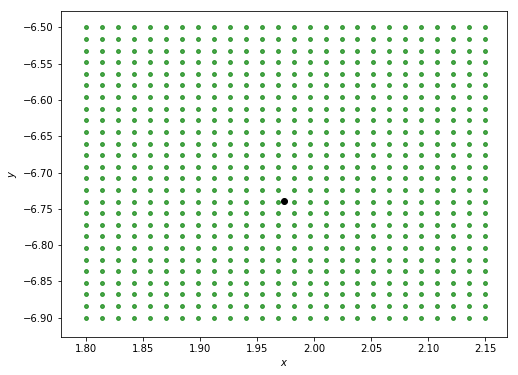

In [173]:
a, N = 25, 26
xs = np.linspace(1.8, 2.15, N)
ys = np.linspace(-6.9, -6.5, N)

plt.figure(figsize=(8,6))

for x in xs:
    for y in ys:
        x0, y0 = Newton_method([x, y], 1e-6, 50)
        if p([x0, y0], x_true) < 1e-6:
            plt.scatter([x], [y], c='g', s=15, alpha=0.7)
        else:
            plt.scatter([x], [y], c='r', marker='x', alpha=0.7)
            print(x, y, p([x0, y0], x_true))

plt.scatter([x_true[0]], [x_true[1]], c='black');
plt.xlabel('$x$');
plt.ylabel('$y$');

Как видим в достаточно малой окресности решения для всех узлов метод Ньютона сходится.